In [1]:
%run SAT_help_functions.ipynb

In [12]:
n_trials = 1000
sim_num = 100

prior_OUM = utils.BoxUniform(low=[0,0.5,0,0.1], high=[6,8,10,1]) #vakter
param_OUM = prior_OUM.sample((sim_num,))

In [13]:
par_fitted = np.zeros((sim_num,4))

for i in range(sim_num):
    print(i)
    v,a,k,ter = param_OUM[i]
    model_sim = Model(name='Simple model (simulated)',
                      drift=DriftLinear(drift=v,t = 0,x=k),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=a),
                      overlay=OverlayNonDecision(nondectime=ter),
                      dx=.01, dt=.01, T_dur=5)   
    sol = model_sim.solve()
    samp = sol.resample(1000)
    print(param_OUM[i,:])
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                        t = 0,
                                        x=Fittable(minval=-10, maxval=10)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.01, dt=.01, T_dur=5)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(param_OUM[i,:])
    print(par_fitted[i,:])

0
tensor([2.8705, 6.1734, 6.4226, 0.7423])


Info: Params [2.73091317 5.91622554 4.12943627 0.78527808] gave -791.3624500327879


tensor([2.8705, 6.1734, 6.4226, 0.7423])
[2.73091317 4.12943627 5.91622554 0.78527808]
1
tensor([2.3078, 3.3327, 7.3669, 0.2059])


Info: Params [2.27716624 6.92728047 2.85350269 0.21738768] gave -627.5018550658131


tensor([2.3078, 3.3327, 7.3669, 0.2059])
[2.27716624 2.85350269 6.92728047 0.21738768]
2
tensor([5.3982, 6.7776, 7.2412, 0.2267])


Info: Params [5.23173589 6.64667005 4.39938281 0.26197653] gave -2171.0717214523374


tensor([5.3982, 6.7776, 7.2412, 0.2267])
[5.23173589 4.39938281 6.64667005 0.26197653]
3
tensor([3.7454, 1.2762, 8.1391, 0.5163])


Info: Params [3.5283987  7.50919769 1.05266895 0.52281063] gave -1841.165649031569


tensor([3.7454, 1.2762, 8.1391, 0.5163])
[3.5283987  1.05266895 7.50919769 0.52281063]
4
tensor([1.9108, 3.2107, 7.7864, 0.4404])


Info: Params [1.89141363 7.72634662 4.59717282 0.40235497] gave -360.5834529300074


tensor([1.9108, 3.2107, 7.7864, 0.4404])
[1.89141363 4.59717282 7.72634662 0.40235497]
5
tensor([3.3692, 7.0695, 1.1311, 0.6380])


Info: Params [ 5.18160778 -0.20309493  4.49749325  0.79526039] gave -158.38279061468967


tensor([3.3692, 7.0695, 1.1311, 0.6380])
[ 5.18160778  4.49749325 -0.20309493  0.79526039]
6
tensor([3.7392, 2.6322, 8.0560, 0.5982])


Info: Params [3.59039448 7.55466154 1.89051407 0.6267678 ] gave -1698.474582241428


tensor([3.7392, 2.6322, 8.0560, 0.5982])
[3.59039448 1.89051407 7.55466154 0.6267678 ]
7
tensor([1.7806, 4.6771, 2.6926, 0.9617])


Info: Params [1.73481105 2.80394815 5.57714894 0.93306898] gave 695.6274816767442


tensor([1.7806, 4.6771, 2.6926, 0.9617])
[1.73481105 5.57714894 2.80394815 0.93306898]
8
tensor([5.8331, 7.4725, 6.7070, 0.2776])


Info: Params [6.         6.40247275 6.41737064 0.29835022] gave -2292.5697480450517


tensor([5.8331, 7.4725, 6.7070, 0.2776])
[6.         6.41737064 6.40247275 0.29835022]
9
tensor([5.5769, 4.5094, 9.8232, 0.4372])


Info: Params [5.91183704 9.32573378 5.17539648 0.42651619] gave -2540.4738131322288


tensor([5.5769, 4.5094, 9.8232, 0.4372])
[5.91183704 5.17539648 9.32573378 0.42651619]
10
tensor([2.8617, 6.0177, 0.8693, 0.4364])


Info: Params [3.0428037  0.70010499 5.65001907 0.45978161] gave 285.60077519581273


tensor([2.8617, 6.0177, 0.8693, 0.4364])
[3.0428037  5.65001907 0.70010499 0.45978161]
11
tensor([4.0131, 7.0331, 8.5208, 0.8206])


Info: Params [3.7641124  8.52718436 7.75900491 0.81854823] gave -1640.402325045462


tensor([4.0131, 7.0331, 8.5208, 0.8206])
[3.7641124  7.75900491 8.52718436 0.81854823]
12
tensor([4.6976, 2.5499, 4.9323, 0.5700])


Info: Params [5.02533988 6.13835977 6.55240713 0.47507489] gave -1973.3800694901497


tensor([4.6976, 2.5499, 4.9323, 0.5700])
[5.02533988 6.55240713 6.13835977 0.47507489]
13
tensor([5.9467, 4.2448, 0.5216, 0.7706])


Info: Params [5.13413371 1.43468144 5.73785044 0.71746697] gave -1138.1013317997808


tensor([5.9467, 4.2448, 0.5216, 0.7706])
[5.13413371 5.73785044 1.43468144 0.71746697]
14
tensor([5.2565, 3.9318, 0.2824, 0.9139])


Info: Params [5.08103941 0.53632144 5.40162206 0.76248941] gave -657.998914811007


tensor([5.2565, 3.9318, 0.2824, 0.9139])
[5.08103941 5.40162206 0.53632144 0.76248941]
15
tensor([4.5516, 6.5368, 8.8969, 0.1013])


Info: Params [4.53885727 8.92969972 6.71783334 0.1025605 ] gave -1965.2813792921215


tensor([4.5516, 6.5368, 8.8969, 0.1013])
[4.53885727 6.71783334 8.92969972 0.1025605 ]
16
tensor([3.7839, 6.3319, 9.0264, 0.2218])


Info: Params [3.6949682  8.69444664 6.08945682 0.22518185] gave -1596.8489765424924


tensor([3.7839, 6.3319, 9.0264, 0.2218])
[3.6949682  6.08945682 8.69444664 0.22518185]
17
tensor([2.6186, 7.8415, 9.7613, 0.2745])


Info: Params [2.61003041 9.80731066 6.04183837 0.30385484] gave -1027.3277707675106


tensor([2.6186, 7.8415, 9.7613, 0.2745])
[2.61003041 6.04183837 9.80731066 0.30385484]
18
tensor([1.1427, 7.7034, 5.4196, 0.4324])


Info: Params [1.12529984 5.03692884 5.15105141 0.48505195] gave 633.1053707505642


tensor([1.1427, 7.7034, 5.4196, 0.4324])
[1.12529984 5.15105141 5.03692884 0.48505195]
19
tensor([2.9445, 7.6074, 9.3028, 0.7700])


Info: Params [3.11437235 9.02873744 3.61286017 0.84792611] gave -1352.360495048516


tensor([2.9445, 7.6074, 9.3028, 0.7700])
[3.11437235 3.61286017 9.02873744 0.84792611]
20
tensor([3.4248, 6.1427, 4.4948, 0.2172])


Info: Params [3.31261816 4.3531026  5.35526651 0.2353536 ] gave -1021.4531396626613


tensor([3.4248, 6.1427, 4.4948, 0.2172])
[3.31261816 5.35526651 4.3531026  0.2353536 ]
21
tensor([2.3005, 4.1994, 7.2061, 0.6071])


Info: Params [2.42396693 7.62559805 6.75123895 0.56598136] gave -678.0571157904426


tensor([2.3005, 4.1994, 7.2061, 0.6071])
[2.42396693 6.75123895 7.62559805 0.56598136]
22
tensor([4.0181, 1.8235, 1.5322, 0.6336])


Info: Params [4.45364644 1.03152518 1.97270061 0.62736342] gave -1264.5545206380843


tensor([4.0181, 1.8235, 1.5322, 0.6336])
[4.45364644 1.97270061 1.03152518 0.62736342]
23
tensor([4.0623, 4.9044, 2.2452, 0.9358])


Info: Params [4.3567385  1.5467037  3.59198665 0.99433445] gave -1062.5517135296423


tensor([4.0623, 4.9044, 2.2452, 0.9358])
[4.3567385  3.59198665 1.5467037  0.99433445]
24
tensor([2.4306, 6.4476, 5.8840, 0.1604])


Info: Params [2.59310586 6.19794976 7.61144421 0.16636326] gave -666.7060427135674


tensor([2.4306, 6.4476, 5.8840, 0.1604])
[2.59310586 7.61144421 6.19794976 0.16636326]
25
tensor([2.4442, 6.5437, 3.0476, 0.1895])


Info: Params [2.37797611 2.83201851 4.43171794 0.27487851] gave -67.78816967105004


tensor([2.4442, 6.5437, 3.0476, 0.1895])
[2.37797611 4.43171794 2.83201851 0.27487851]
26
tensor([1.2206, 2.3867, 3.0543, 0.4871])


Info: Params [1.17468711 2.78313253 1.84399377 0.54134209] gave 1217.8108551280384


tensor([1.2206, 2.3867, 3.0543, 0.4871])
[1.17468711 1.84399377 2.78313253 0.54134209]
27
tensor([2.4084, 6.0841, 9.7088, 0.1324])


Info: Params [2.43726516 9.95112225 6.57969357 0.13702214] gave -937.1851874972714


tensor([2.4084, 6.0841, 9.7088, 0.1324])
[2.43726516 6.57969357 9.95112225 0.13702214]
28
tensor([4.2909, 5.2105, 8.7948, 0.6262])


Info: Params [4.55567447 8.95407832 4.58280367 0.64099462] gave -2057.3556995636536


tensor([4.2909, 5.2105, 8.7948, 0.6262])
[4.55567447 4.58280367 8.95407832 0.64099462]
29
tensor([5.1140, 7.9320, 2.7350, 0.8250])


Info: Params [6.         1.41487985 4.51890786 0.92471934] gave -1501.7443932963974


tensor([5.1140, 7.9320, 2.7350, 0.8250])
[6.         4.51890786 1.41487985 0.92471934]
30
tensor([5.7347, 5.3302, 2.4360, 0.7837])


Info: Params [5.96864225 2.49161133 6.75117529 0.73643476] gave -1674.2195278737477


tensor([5.7347, 5.3302, 2.4360, 0.7837])
[5.96864225 6.75117529 2.49161133 0.73643476]
31
tensor([3.9574, 1.9639, 2.9711, 0.6398])


Info: Params [4.34012469 1.19386864 1.4442202  0.6756005 ] gave -1511.6667026293026


tensor([3.9574, 1.9639, 2.9711, 0.6398])
[4.34012469 1.4442202  1.19386864 0.6756005 ]
32
tensor([3.4222, 4.3412, 8.2635, 0.3131])


Info: Params [3.41411497 8.05473308 4.66437066 0.30636314] gave -1461.040006609339


tensor([3.4222, 4.3412, 8.2635, 0.3131])
[3.41411497 4.66437066 8.05473308 0.30636314]
33
tensor([5.7044, 4.0638, 1.9749, 0.3458])


Info: Params [5.24874997 3.19331094 7.14369928 0.26949682] gave -1617.1650390845862


tensor([5.7044, 4.0638, 1.9749, 0.3458])
[5.24874997 7.14369928 3.19331094 0.26949682]
34
tensor([4.1936, 5.5285, 1.4684, 0.6408])


Info: Params [4.1633007  1.46425164 5.78106142 0.62602846] gave -781.0556884370195


tensor([4.1936, 5.5285, 1.4684, 0.6408])
[4.1633007  5.78106142 1.46425164 0.62602846]
35
tensor([2.7376, 5.2947, 8.9933, 0.9381])


Info: Params [2.77110006 8.83124451 4.04064374 0.9653886 ] gave -1105.4093106346327


tensor([2.7376, 5.2947, 8.9933, 0.9381])
[2.77110006 4.04064374 8.83124451 0.9653886 ]
36
tensor([5.9767, 4.5872, 3.2286, 0.3429])


Info: Params [5.63513195 3.45007455 3.79473534 0.38602316] gave -1986.4674042141714


tensor([5.9767, 4.5872, 3.2286, 0.3429])
[5.63513195 3.79473534 3.45007455 0.38602316]
37
tensor([5.1037, 6.7689, 0.7614, 0.4861])


Info: Params [ 5.89010195 -0.10825367  4.13102857  0.68724931] gave -705.0545979352127


tensor([5.1037, 6.7689, 0.7614, 0.4861])
[ 5.89010195  4.13102857 -0.10825367  0.68724931]
38
tensor([4.6235, 2.7147, 5.8216, 0.8164])


Info: Params [4.54913004 5.20785116 1.95076707 0.84973361] gave -2025.2424908054659


tensor([4.6235, 2.7147, 5.8216, 0.8164])
[4.54913004 1.95076707 5.20785116 0.84973361]
39
tensor([0.0216, 7.9400, 7.0028, 0.3759])


Info: Params [0.         6.91341067 7.63458824 0.37006575] gave 569.2015587157904


tensor([0.0216, 7.9400, 7.0028, 0.3759])
[0.         7.63458824 6.91341067 0.37006575]
40
tensor([1.7928, 6.0665, 3.4645, 0.2244])


Info: Params [1.81772965 3.42069606 7.13052563 0.18494511] gave 479.3925395959678


tensor([1.7928, 6.0665, 3.4645, 0.2244])
[1.81772965 7.13052563 3.42069606 0.18494511]
41
tensor([4.4129, 2.2030, 3.1167, 0.6448])


Info: Params [4.44919252 2.85100391 1.74772733 0.6818234 ] gave -1756.741192112322


tensor([4.4129, 2.2030, 3.1167, 0.6448])
[4.44919252 1.74772733 2.85100391 0.6818234 ]
42
tensor([4.6603, 3.9106, 5.2589, 0.9817])


Info: Params [5.27544337 4.52407606 4.63882465 0.9500685 ] gave -1965.4086474153405


tensor([4.6603, 3.9106, 5.2589, 0.9817])
[5.27544337 4.63882465 4.52407606 0.9500685 ]
43
tensor([3.8967, 4.1212, 0.7794, 0.8620])


Info: Params [4.18403134 0.83159147 5.75148997 0.71049844] gave -448.7760104328917


tensor([3.8967, 4.1212, 0.7794, 0.8620])
[4.18403134 5.75148997 0.83159147 0.71049844]
44
tensor([1.9312, 3.9898, 1.8744, 0.8236])


Info: Params [1.948986   1.99082428 5.23578417 0.74062735] gave 639.8224054762593


tensor([1.9312, 3.9898, 1.8744, 0.8236])
[1.948986   5.23578417 1.99082428 0.74062735]
45
tensor([3.5653, 7.0737, 4.8670, 0.6808])


Info: Params [3.42019476 4.27685724 2.77384729 0.82903471] gave -1171.3876624614654


tensor([3.5653, 7.0737, 4.8670, 0.6808])
[3.42019476 2.77384729 4.27685724 0.82903471]
46
tensor([5.8322, 5.2810, 1.9549, 0.1212])


Info: Params [5.47810694 2.60818591 5.90650725 0.13418742] gave -1598.4041285173248


tensor([5.8322, 5.2810, 1.9549, 0.1212])
[5.47810694 5.90650725 2.60818591 0.13418742]
47
tensor([2.7026, 1.0401, 4.6809, 0.6460])


Info: Params [2.67116282 4.62208365 1.11632665 0.63689202] gave -998.7686758991252


tensor([2.7026, 1.0401, 4.6809, 0.6460])
[2.67116282 1.11632665 4.62208365 0.63689202]
48
tensor([4.4628, 7.9219, 5.4140, 0.9381])


Info: Params [4.73330006 4.11994158 5.13372011 0.96397569] gave -1698.4205500144963


tensor([4.4628, 7.9219, 5.4140, 0.9381])
[4.73330006 5.13372011 4.11994158 0.96397569]
49
tensor([0.7552, 1.3739, 5.4961, 0.7282])


Info: Params [0.78430012 5.67903565 1.83117895 0.69771416] gave 603.6477577953299


tensor([0.7552, 1.3739, 5.4961, 0.7282])
[0.78430012 1.83117895 5.67903565 0.69771416]
50
tensor([5.6371, 4.5466, 2.2533, 0.7053])


Info: Params [5.62581536 1.67860202 3.81604003 0.7134179 ] gave -1560.3327169605213


tensor([5.6371, 4.5466, 2.2533, 0.7053])
[5.62581536 3.81604003 1.67860202 0.7134179 ]
51
tensor([5.8587, 0.6465, 7.5678, 0.9733])


Info: Params [6.         7.85825646 0.75010565 0.97100284] gave -3234.048898518712


tensor([5.8587, 0.6465, 7.5678, 0.9733])
[6.         0.75010565 7.85825646 0.97100284]
52
tensor([5.6229, 4.5207, 4.5737, 0.1101])


Info: Params [5.92942003 4.85501051 5.61486156 0.10743557] gave -2103.5128092163955


tensor([5.6229, 4.5207, 4.5737, 0.1101])
[5.92942003 5.61486156 4.85501051 0.10743557]
53
tensor([0.2492, 3.8607, 8.6649, 0.7284])


Info: Params [0.3359631  7.85765905 2.18787305 0.77822365] gave 190.02248097381113


tensor([0.2492, 3.8607, 8.6649, 0.7284])
[0.3359631  2.18787305 7.85765905 0.77822365]
54
tensor([5.4030, 4.4884, 4.0368, 0.1883])


Info: Params [6.         3.20585176 4.21223238 0.18160604] gave -1969.8274372661408


tensor([5.4030, 4.4884, 4.0368, 0.1883])
[6.         4.21223238 3.20585176 0.18160604]
55
tensor([4.2997, 4.2238, 8.3074, 0.1447])


Info: Params [4.12616134 7.12463482 2.76993381 0.16452898] gave -1881.257859403404


tensor([4.2997, 4.2238, 8.3074, 0.1447])
[4.12616134 2.76993381 7.12463482 0.16452898]
56
tensor([0.3190, 3.3893, 8.0898, 0.6198])


Info: Params [0.35391865 8.06137679 2.48843029 0.65078246] gave 169.37988351839527


tensor([0.3190, 3.3893, 8.0898, 0.6198])
[0.35391865 2.48843029 8.06137679 0.65078246]
57
tensor([3.6764, 6.1513, 6.0631, 0.7611])


Info: Params [3.59072026 6.17794653 7.33751442 0.74640101] gave -1301.1174436798942


tensor([3.6764, 6.1513, 6.0631, 0.7611])
[3.59072026 7.33751442 6.17794653 0.74640101]
58
tensor([3.7167, 5.0439, 8.5543, 0.2888])


Info: Params [3.65403134 8.14085391 5.80587212 0.26026967] gave -1535.295258513213


tensor([3.7167, 5.0439, 8.5543, 0.2888])
[3.65403134 5.80587212 8.14085391 0.26026967]
59
tensor([3.5843, 5.4851, 2.8830, 0.7603])


Info: Params [3.66993173 2.85179742 6.79902246 0.71069217] gave -949.8997949286016


tensor([3.5843, 5.4851, 2.8830, 0.7603])
[3.66993173 6.79902246 2.85179742 0.71069217]
60
tensor([3.4702, 0.6878, 2.9846, 0.2326])


Info: Params [3.46265264 3.21890203 0.69659619 0.23335702] gave -1826.8101115347636


tensor([3.4702, 0.6878, 2.9846, 0.2326])
[3.46265264 0.69659619 3.21890203 0.23335702]
61
tensor([5.0783, 2.4235, 6.6486, 0.2999])


Info: Params [5.0670224  7.24366596 2.67121416 0.29381954] gave -2320.278570163946


tensor([5.0783, 2.4235, 6.6486, 0.2999])
[5.0670224  2.67121416 7.24366596 0.29381954]
62
tensor([3.9376, 1.9174, 6.4847, 0.2389])


Info: Params [4.00173492 7.31728757 3.32269561 0.19829469] gave -1732.4015353826921


tensor([3.9376, 1.9174, 6.4847, 0.2389])
[4.00173492 3.32269561 7.31728757 0.19829469]
63
tensor([3.4679, 5.4950, 1.6722, 0.7243])


Info: Params [3.45493943 1.70954085 7.00561581 0.63119386] gave -500.4122543322311


tensor([3.4679, 5.4950, 1.6722, 0.7243])
[3.45493943 7.00561581 1.70954085 0.63119386]
64
tensor([5.2308, 1.6561, 0.1724, 0.3371])


Info: Params [4.69722367 2.21348949 2.87606879 0.25409205] gave -1524.4347996537622


tensor([5.2308, 1.6561, 0.1724, 0.3371])
[4.69722367 2.87606879 2.21348949 0.25409205]
65
tensor([5.6912, 0.8993, 5.2583, 0.4422])


Info: Params [6.         4.66955382 0.98957811 0.44197893] gave -2876.6815279902


tensor([5.6912, 0.8993, 5.2583, 0.4422])
[6.         0.98957811 4.66955382 0.44197893]
66
tensor([1.3918, 4.0980, 4.2898, 0.7052])


Info: Params [1.36379071 4.05906231 2.12788323 0.82953003] gave 642.1694901116558


tensor([1.3918, 4.0980, 4.2898, 0.7052])
[1.36379071 2.12788323 4.05906231 0.82953003]
67
tensor([1.9414, 2.6922, 3.7238, 0.1537])


Info: Params [1.94552066 3.81590665 2.17304867 0.2115688 ] gave 101.11338134663697


tensor([1.9414, 2.6922, 3.7238, 0.1537])
[1.94552066 2.17304867 3.81590665 0.2115688 ]
68
tensor([1.9608, 1.6926, 4.5386, 0.8124])


Info: Params [2.08755664 4.69057815 1.72263105 0.82899356] gave -278.91637199594413


tensor([1.9608, 1.6926, 4.5386, 0.8124])
[2.08755664 1.72263105 4.69057815 0.82899356]
69
tensor([2.4620, 0.7652, 8.1829, 0.6794])


Info: Params [2.45578589 9.2999028  0.80884222 0.68985672] gave -1289.8873415108828


tensor([2.4620, 0.7652, 8.1829, 0.6794])
[2.45578589 0.80884222 9.2999028  0.68985672]
70
tensor([2.5328, 1.5287, 3.5665, 0.9694])


Info: Params [2.5588602  4.16988771 1.92833745 0.94083763] gave -596.9172755780713


tensor([2.5328, 1.5287, 3.5665, 0.9694])
[2.5588602  1.92833745 4.16988771 0.94083763]
71
tensor([3.1295, 4.5177, 6.4902, 0.1671])


Info: Params [2.98157892 5.41825904 2.95866413 0.19145964] gave -1015.2538507528506


tensor([3.1295, 4.5177, 6.4902, 0.1671])
[2.98157892 2.95866413 5.41825904 0.19145964]
72
tensor([1.0170, 5.2498, 2.4156, 0.8441])


Info: Params [1.00110366 2.46082254 6.46017365 0.7629813 ] gave 1747.53576590569


tensor([1.0170, 5.2498, 2.4156, 0.8441])
[1.00110366 6.46017365 2.46082254 0.7629813 ]
73
tensor([3.0104, 6.5577, 2.9808, 0.6367])


Info: Params [2.94688311 2.87709023 7.04840273 0.5938501 ] gave -489.8313410016352


tensor([3.0104, 6.5577, 2.9808, 0.6367])
[2.94688311 7.04840273 2.87709023 0.5938501 ]
74
tensor([5.8161, 6.5372, 7.1914, 0.8029])


Info: Params [5.61095978 7.45661388 7.51534565 0.79607313] gave -2209.649089855126


tensor([5.8161, 6.5372, 7.1914, 0.8029])
[5.61095978 7.51534565 7.45661388 0.79607313]
75
tensor([1.6598, 3.4989, 8.1459, 0.3852])


Info: Params [1.54599178 7.65717645 2.92901505 0.39064212] gave -209.6768439795997


tensor([1.6598, 3.4989, 8.1459, 0.3852])
[1.54599178 2.92901505 7.65717645 0.39064212]
76
tensor([0.6683, 1.5163, 4.4970, 0.8773])


Info: Params [0.57278903 4.68356816 1.55718835 0.88606914] gave 959.4301654927032


tensor([0.6683, 1.5163, 4.4970, 0.8773])
[0.57278903 1.55718835 4.68356816 0.88606914]
77
tensor([5.9908, 4.5148, 3.3419, 0.3959])


Info: Params [5.9350513  2.91590178 3.77949887 0.41971846] gave -1951.4711710387096


tensor([5.9908, 4.5148, 3.3419, 0.3959])
[5.9350513  3.77949887 2.91590178 0.41971846]
78
tensor([5.3116, 1.1571, 4.4041, 0.6510])


Info: Params [5.28942778 5.31508374 1.4299689  0.64411828] gave -2481.8813265427316


tensor([5.3116, 1.1571, 4.4041, 0.6510])
[5.28942778 1.4299689  5.31508374 0.64411828]
79
tensor([1.3516, 1.3659, 3.3072, 0.8017])


Info: Params [1.36431611 2.97787967 1.20104523 0.8231432 ] gave 712.4323289261428


tensor([1.3516, 1.3659, 3.3072, 0.8017])
[1.36431611 1.20104523 2.97787967 0.8231432 ]
80
tensor([5.0964, 2.1551, 5.4977, 0.4077])


Info: Params [4.85549643 6.40912485 2.36442553 0.40114744] gave -2213.0498041954015


tensor([5.0964, 2.1551, 5.4977, 0.4077])
[4.85549643 2.36442553 6.40912485 0.40114744]
81
tensor([2.5364, 1.5437, 7.0801, 0.4222])


Info: Params [2.4791572  6.95562747 1.4610838  0.43464584] gave -877.1950902438472


tensor([2.5364, 1.5437, 7.0801, 0.4222])
[2.4791572  1.4610838  6.95562747 0.43464584]
82
tensor([0.8350, 5.9567, 5.1685, 0.3986])


Info: Params [0.88639485 5.11337699 5.49344567 0.40415904] gave 788.4166310111657


tensor([0.8350, 5.9567, 5.1685, 0.3986])
[0.88639485 5.49344567 5.11337699 0.40415904]
83
tensor([2.2098, 6.9022, 3.0604, 0.2969])


Info: Params [2.1964039  2.94065138 4.13401283 0.43514314] gave 76.25443846151515


tensor([2.2098, 6.9022, 3.0604, 0.2969])
[2.1964039  4.13401283 2.94065138 0.43514314]
84
tensor([4.5426, 5.6832, 2.8994, 0.9130])


Info: Params [4.26837007 3.30926684 6.91504634 0.88187113] gave -1320.0368633375


tensor([4.5426, 5.6832, 2.8994, 0.9130])
[4.26837007 6.91504634 3.30926684 0.88187113]
85
tensor([1.3066, 2.7139, 7.3267, 0.4564])


Info: Params [1.30370116 7.35465443 3.47380354 0.43501769] gave 16.94297404806457


tensor([1.3066, 2.7139, 7.3267, 0.4564])
[1.30370116 3.47380354 7.35465443 0.43501769]
86
tensor([5.8574, 2.6078, 4.0493, 0.2641])


Info: Params [5.56102152 3.90149383 2.0505393  0.29042871] gave -2262.8562533928225


tensor([5.8574, 2.6078, 4.0493, 0.2641])
[5.56102152 2.0505393  3.90149383 0.29042871]
87
tensor([4.3025, 5.6067, 7.5684, 0.9028])


Info: Params [4.10303908 6.93299129 3.29414911 0.95222505] gave -1812.750185924771


tensor([4.3025, 5.6067, 7.5684, 0.9028])
[4.10303908 3.29414911 6.93299129 0.95222505]
88
tensor([5.9065, 4.8085, 9.2126, 0.6499])


Info: Params [6.         8.87345561 5.33301312 0.63146091] gave -2535.9782059387544


tensor([5.9065, 4.8085, 9.2126, 0.6499])
[6.         5.33301312 8.87345561 0.63146091]
89
tensor([5.0111, 2.7276, 7.6036, 0.6995])


Info: Params [5.10732139 4.97876253 1.6409501  0.72234001] gave -2328.0372674065115


tensor([5.0111, 2.7276, 7.6036, 0.6995])
[5.10732139 1.6409501  4.97876253 0.72234001]
90
tensor([4.9884, 0.7221, 3.3716, 0.2116])


Info: Params [5.07036205 5.96831562 0.87730462 0.21695089] gave -2681.73178112849


tensor([4.9884, 0.7221, 3.3716, 0.2116])
[5.07036205 0.87730462 5.96831562 0.21695089]
91
tensor([1.6925, 5.8773, 3.4449, 0.2074])


Info: Params [1.77184179 3.54845107 7.70722227 0.15191747] gave 464.7410243333778


tensor([1.6925, 5.8773, 3.4449, 0.2074])
[1.77184179 7.70722227 3.54845107 0.15191747]
92
tensor([3.1402, 3.5541, 0.8336, 0.3152])


Info: Params [3.00192716 1.01431507 3.47847941 0.34777018] gave -90.46620035887364


tensor([3.1402, 3.5541, 0.8336, 0.3152])
[3.00192716 3.47847941 1.01431507 0.34777018]
93
tensor([5.8786, 1.2211, 8.8556, 0.5890])


Info: Params [5.89892863 9.51835638 1.35151485 0.58542892] gave -2952.070822837484


tensor([5.8786, 1.2211, 8.8556, 0.5890])
[5.89892863 1.35151485 9.51835638 0.58542892]
94
tensor([1.0834, 3.6341, 1.2134, 0.2344])


Info: Params [1.16252495 1.24305128 3.87351935 0.23619622] gave 2098.975018001511


tensor([1.0834, 3.6341, 1.2134, 0.2344])
[1.16252495 3.87351935 1.24305128 0.23619622]
95
tensor([3.2498, 5.5285, 5.6216, 0.3770])


Info: Params [3.32711899 5.37756568 5.42022338 0.37584104] gave -1149.289768073529


tensor([3.2498, 5.5285, 5.6216, 0.3770])
[3.32711899 5.42022338 5.37756568 0.37584104]
96
tensor([1.8603, 4.9550, 8.5425, 0.7857])


Info: Params [1.89238103 8.86248757 7.36676961 0.75908843] gave -491.32942467173496


tensor([1.8603, 4.9550, 8.5425, 0.7857])
[1.89238103 7.36676961 8.86248757 0.75908843]
97
tensor([2.3655, 1.0026, 0.3263, 0.9607])


Info: Params [2.2023986  0.96070776 1.0526949  0.96102204] gave -85.17512224230737


tensor([2.3655, 1.0026, 0.3263, 0.9607])
[2.2023986  1.0526949  0.96070776 0.96102204]
98
tensor([2.9439, 6.7977, 4.6070, 0.5906])


Info: Params [2.88876366 4.48391772 5.26117052 0.6413901 ] gave -734.5060259601058


tensor([2.9439, 6.7977, 4.6070, 0.5906])
[2.88876366 5.26117052 4.48391772 0.6413901 ]
99
tensor([3.8725, 4.1250, 5.8140, 0.6737])


Info: Params [3.89987512 6.15198367 7.05215733 0.61460268] gave -1473.0757949884119


tensor([3.8725, 4.1250, 5.8140, 0.6737])
[3.89987512 7.05215733 6.15198367 0.61460268]


In [14]:
def sim_fit_plot_all(par, par_fitted, par_labels, par_fitted_labels, fontsize, s = 4, figsize=(10,10)):

    param_num = par.shape[1]
    param_fitted_num = par_fitted.shape[1]

    fig, axes = plt.subplots(param_fitted_num, param_num, figsize=figsize)

    for i in range(param_num):
        for j in range(param_fitted_num):
            axes[j,i].scatter(par[:,i], par_fitted[:,j], s = s, facecolors='none', edgecolors='k')
            #axes[j,i].locator_params(axis='both', nbins=4)
            if j!=(param_fitted_num-1):
                axes[j,i].set_xticks([])
            if i!=0:
                axes[j,i].set_yticks([])

    for m in range(param_fitted_num):
        axes[m,0].set_ylabel(par_fitted_labels[m],fontsize=fontsize)#, rotation=0)

    for n in range(param_num):
        axes[(param_fitted_num-1),n].set_xlabel(par_labels[n], fontsize=fontsize)

    fig.align_ylabels(axes[:, 0])
    return fig, axes


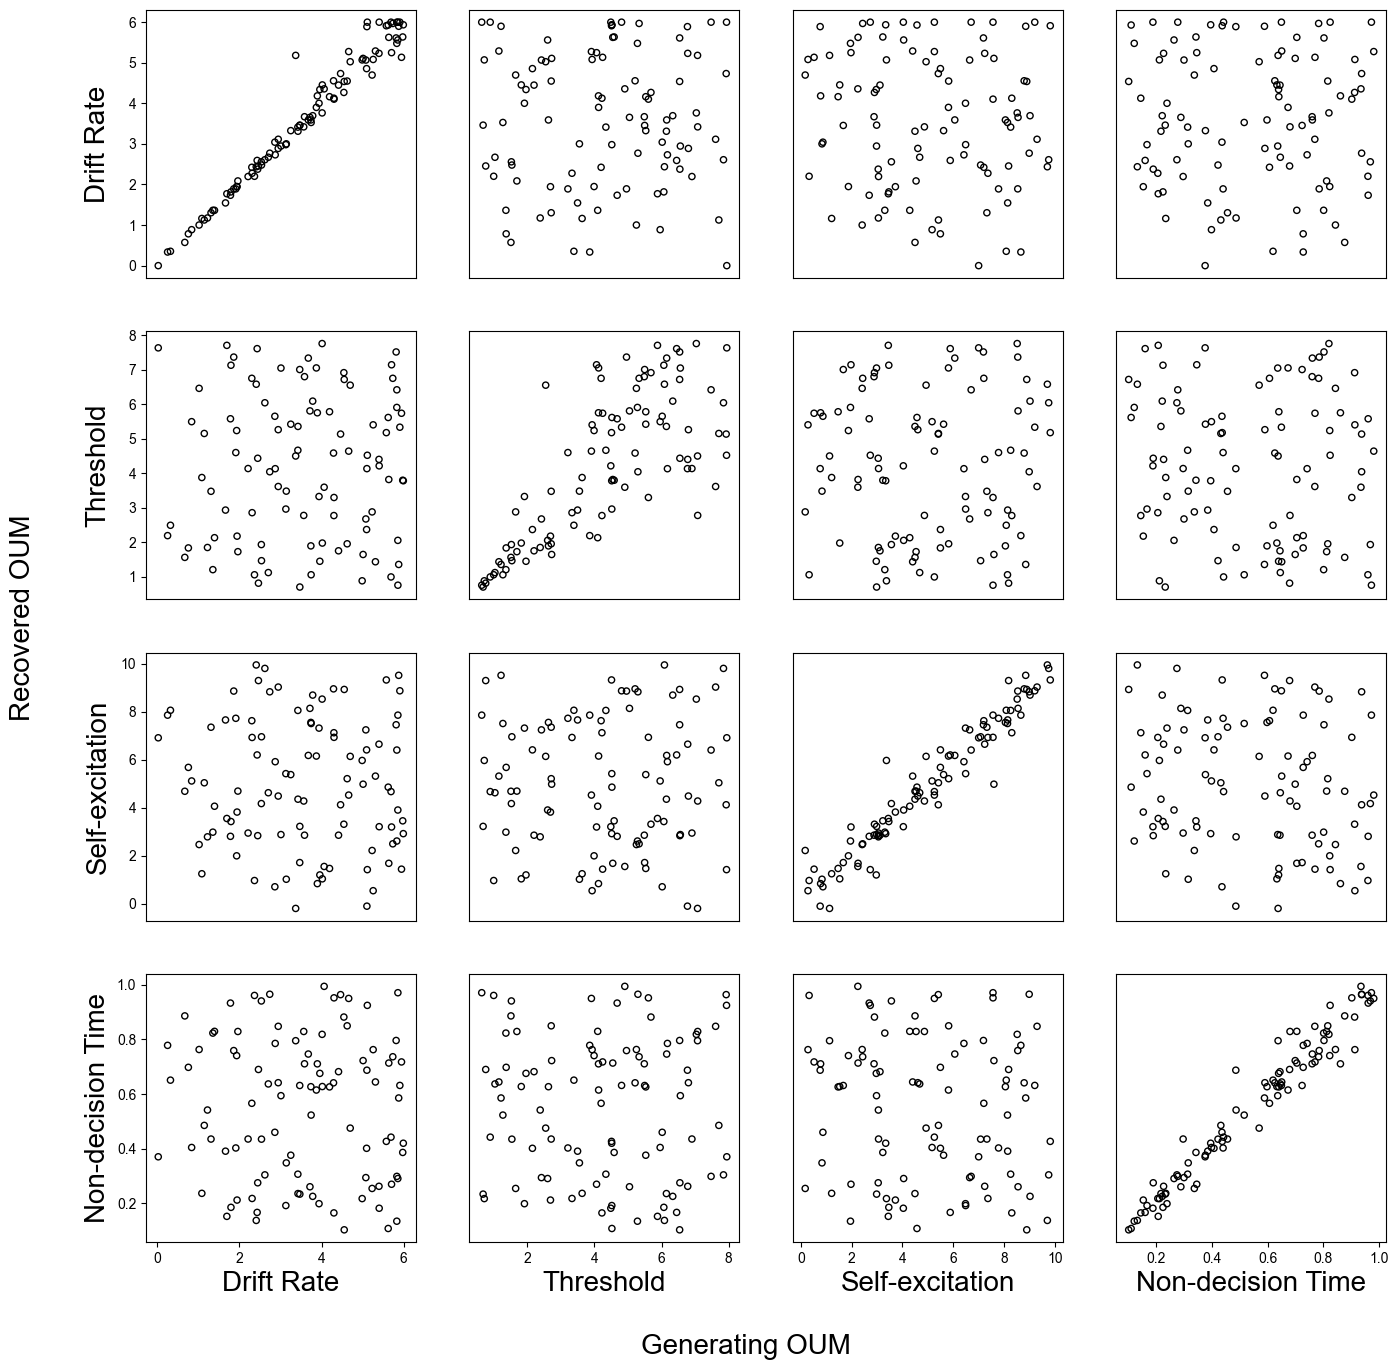

In [10]:
param_OUM = np.array(pd.read_csv("paramerter_recovery_simulated.csv"))[:,1:]
par_fitted = np.array(pd.read_csv("paramerter_recovery_recovered.csv"))[:,1:]
par_labels = ["Drift Rate","Threshold", "Self-excitation","Non-decision Time"]
fig,ax = sim_fit_plot_all(param_OUM, par_fitted, par_labels, par_labels, 
                 fontsize = 20, s = 20, figsize=(16,16))

fig.text(0.5, 0.04, 'Generating OUM', ha='center',fontsize = 20)
fig.text(0.04, 0.5, 'Recovered OUM', va='center', rotation='vertical',fontsize = 20)

plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig2.pdf")

In [16]:
df = pd.DataFrame(param_OUM, columns = ["v", "a", "k", "ter"])
df_fitted = pd.DataFrame(par_fitted, columns = ["v", "a", "k", "ter"])
df.to_csv("paramerter_recovery_simulated.csv")
df_fitted.to_csv("paramerter_recovery_recovered.csv")

Text(0.04, 0.5, 'Recovered OUM')

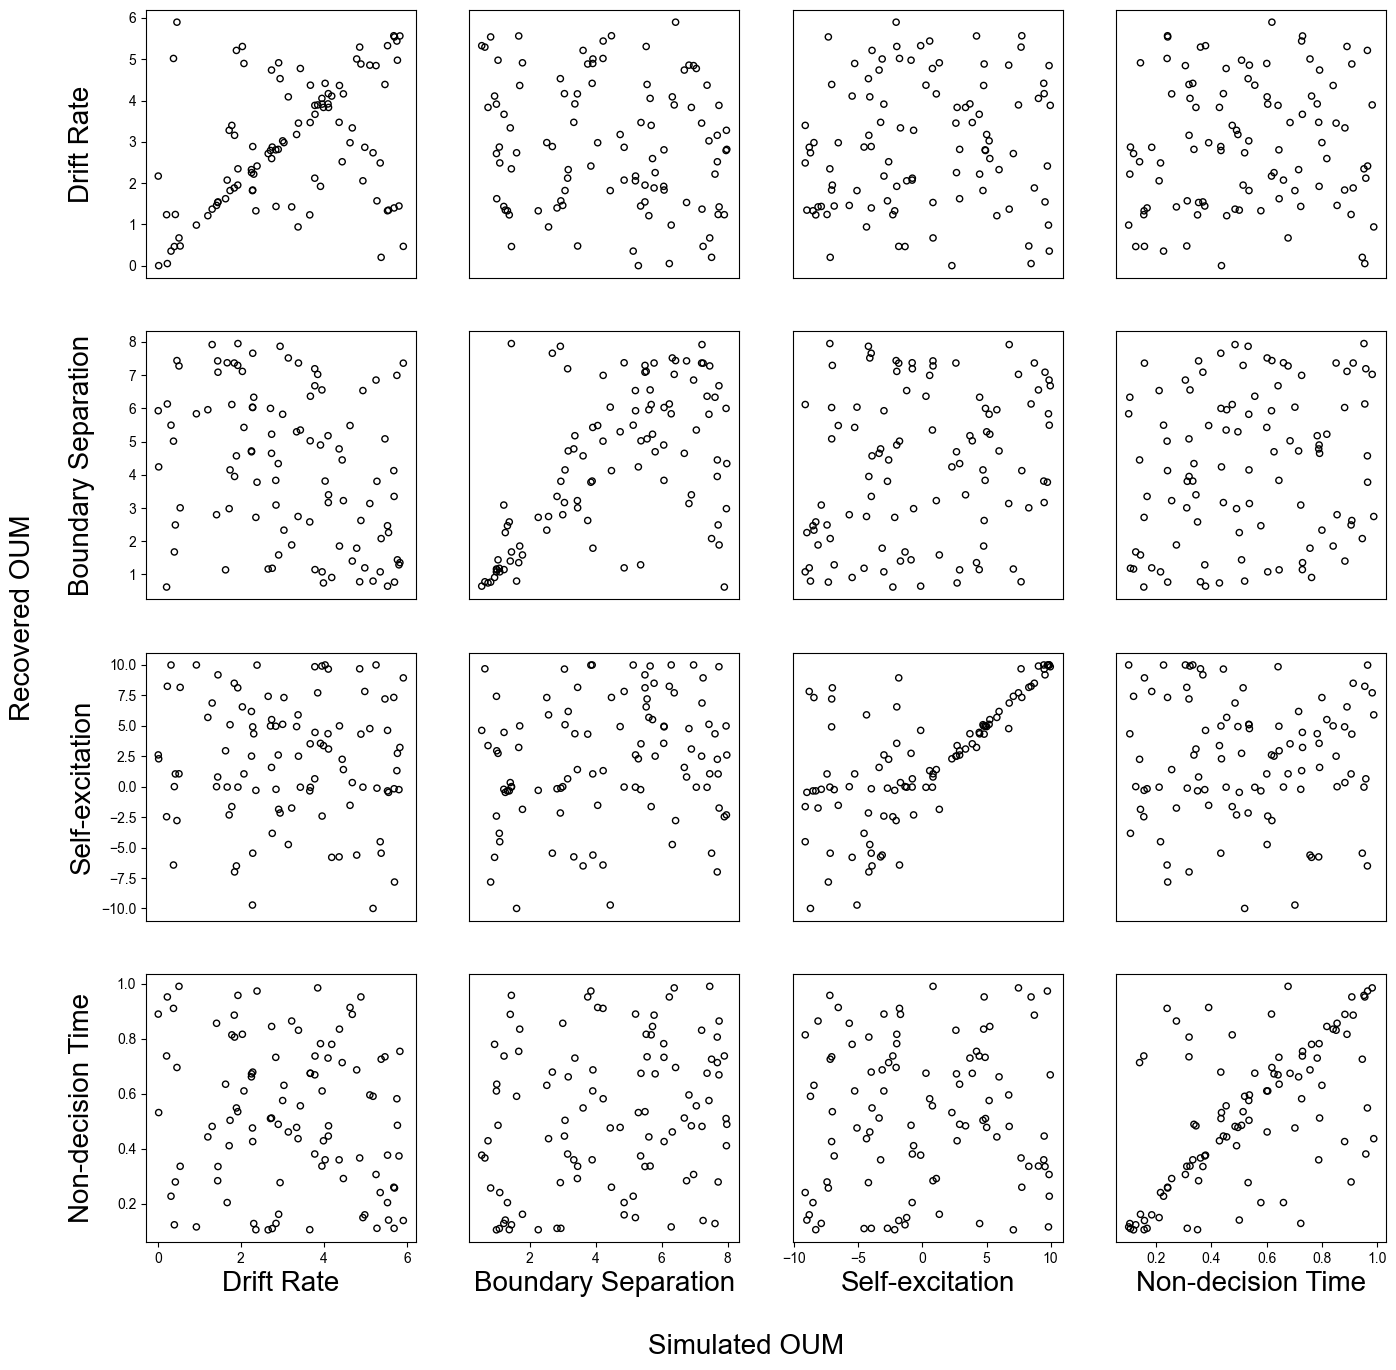

In [7]:
par_labels = ["Drift Rate","Boundary Separation", "Self-excitation","Non-decision Time"]
fig,ax = sim_fit_plot_all(param_OUM, par_fitted, par_labels, par_labels, 
                 fontsize = 20, s = 20, figsize=(16,16))

fig.text(0.5, 0.04, 'Simulated OUM', ha='center',fontsize = 20)
fig.text(0.04, 0.5, 'Recovered OUM', va='center', rotation='vertical',fontsize = 20)

In [10]:
par_labels = ["Drift Rate","Boundary Separation", "Self-excitation","Non-decision Time"]
fig,ax = sim_fit_plot_all(param_OUM, par_fitted, par_labels, par_labels, 
                 fontsize = 20, s = 20, figsize=(16,16))

fig.text(0.5, 0.04, 'Simulated OUM', ha='center',fontsize = 20)
fig.text(0.04, 0.5, 'Recovered OUM', va='center', rotation='vertical',fontsize = 20)

IndexError: tuple index out of range

In [ ]:
    param_num = par.shape[1]
    param_fitted_num = par_fitted.shape[1]

    fig, axes = plt.subplots(param_fitted_num, param_num, figsize=figsize)

    for i in range(param_num):
        for j in range(param_fitted_num):
            axes[j,i].scatter(par[:,i], par_fitted[:,j], s = s, facecolors='none', edgecolors='k')
            #axes[j,i].locator_params(axis='both', nbins=4)
            if j!=(param_fitted_num-1):
                axes[j,i].set_xticks([])
            if i!=0:
                axes[j,i].set_yticks([])

    for m in range(param_fitted_num):
        axes[m,0].set_ylabel(par_fitted_labels[m],fontsize=fontsize)#, rotation=0)

    for n in range(param_num):
        axes[(param_fitted_num-1),n].set_xlabel(par_labels[n], fontsize=fontsize)

    fig.align_ylabels(axes[:, 0])

Text(0, 0.5, 'Recovered Self-excitation')

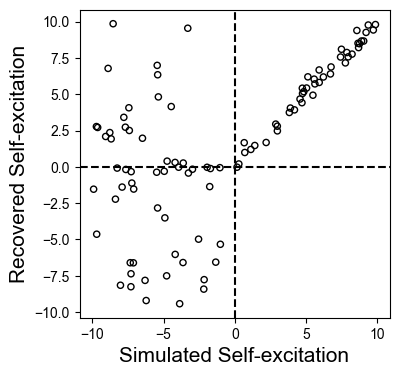

In [20]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.scatter(param_OUM[:,2], par_fitted[:,2],s = 20, facecolors='none', edgecolors='k')
ax.axvline(x=0,linestyle="--",color='black')
ax.axhline(y=0,linestyle="--",color='black')

ax.set_xlabel("Simulated Self-excitation", fontsize = 15)
ax.set_ylabel("Recovered Self-excitation", fontsize = 15)

In [ ]:
def annotate_left(data, **kws):
    r, p = scipy.stats.pearsonr(df.loc[df["x"]<0, "x"], df.loc[df["x"]<0, "y"])
    ax = plt.gca()
    ax.text(.05, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
def annotate_right(data, **kws):
    r, p = scipy.stats.pearsonr(df.loc[df["x"]>0, "x"], df.loc[df["x"]>0, "y"])
    ax = plt.gca()
    ax.text(.7, .6, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

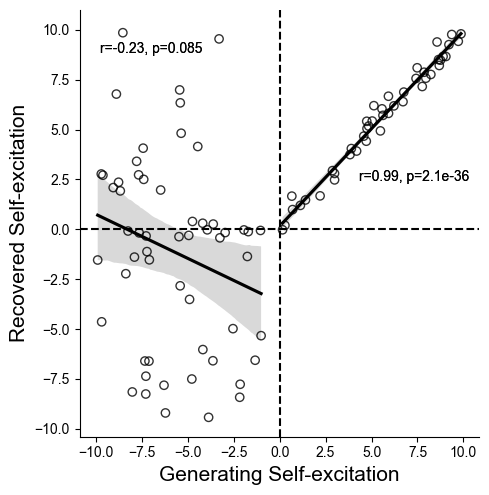

In [80]:
df = pd.DataFrame()

df["x"] = param_OUM[:,2]
df["y"] = par_fitted[:,2]
df["Pos"] = df["x"]>0
    
g = sns.lmplot(data=df, x="x",y="y",hue="Pos",scatter_kws={"edgecolor": "black","facecolor":"none"}, line_kws={"color": "black"})

g.map_dataframe(annotate_left)
g.map_dataframe(annotate_right)

plt.axvline(x=0,linestyle="--",color='black')
plt.axhline(y=0,linestyle="--",color='black')

plt.xlabel("Generating Self-excitation", fontsize = 15)
plt.ylabel("Recovered Self-excitation", fontsize = 15)

g._legend.remove()
plt.show()

In [10]:
df = pd.DataFrame(param_OUM, columns = ["v", "a", "k", "ter"])
df_fitted = pd.DataFrame(par_fitted, columns = ["v", "a", "k", "ter"])

Text(0.04, 0.5, 'Recovered OUM')

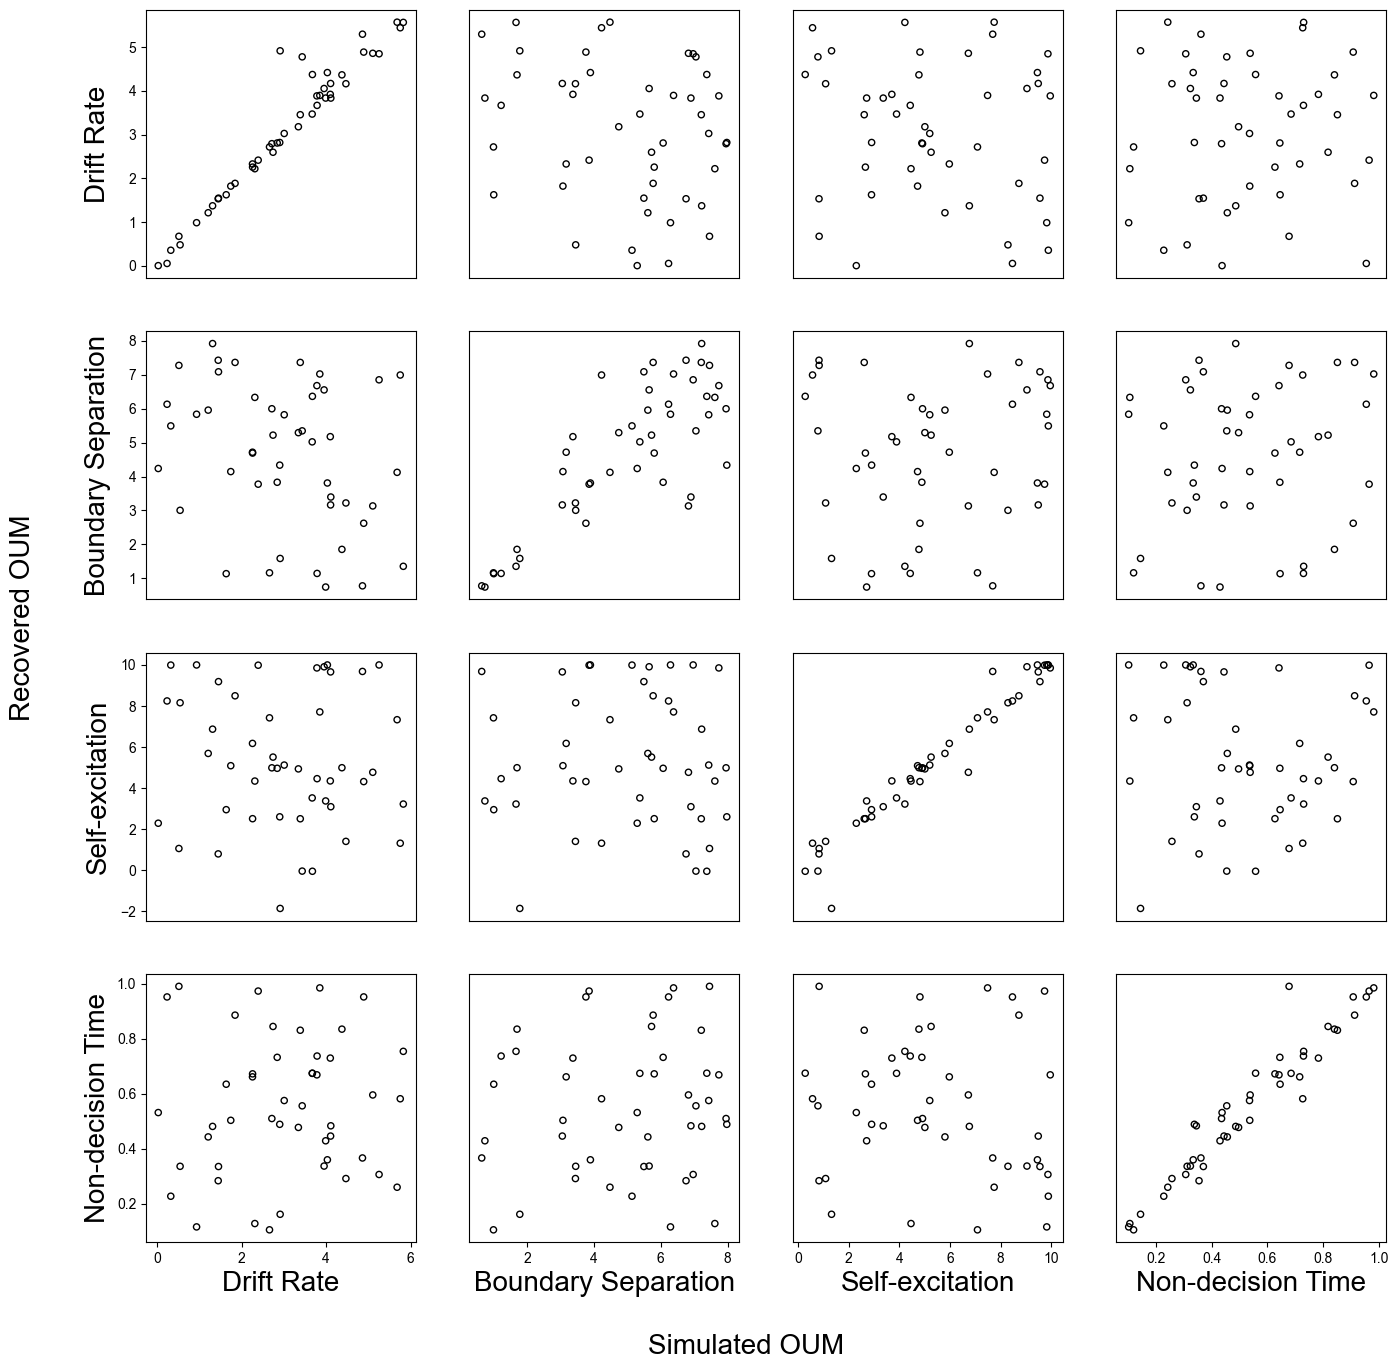

In [11]:
par_labels = ["Drift Rate","Boundary Separation", "Self-excitation","Non-decision Time"]
fig, axes = sim_fit_plot_all(np.array(df[df["k"]>0]), np.array(df_fitted[df["k"]>0]), par_labels, par_labels, 
                 fontsize = 20, s = 20, figsize=(16,16))

fig.text(0.5, 0.04, 'Simulated OUM', ha='center',fontsize = 20)
fig.text(0.04, 0.5, 'Recovered OUM', va='center', rotation='vertical',fontsize = 20)


## Correlate k in OUM and gamma in DDMWeibull

In [133]:
l1 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["lamSpeed"]
a1 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["aprimeSpeed"]
k1 = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresultDutilh2013.csv')["Self-excitation Speed"]
c1 = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresultDutilh2013.csv')["Collapse Speed"]


In [134]:
l2 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["lamAcc"]
a2 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["aprimeAcc"]

k2 = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresultDutilh2013.csv')["Self-excitation Accuracy"]
c2 = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresultDutilh2013.csv')["Collapse Accuracy"]

In [118]:
l = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["lamAcc"]-pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["lamSpeed"]
a = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["aprimeAcc"]-pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["aprimeSpeed"]

k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresultDutilh2013.csv')["Self-excitation Accuracy"]-pd.read_csv('Parameter Estimates/OUM2v2a2k2terresultDutilh2013.csv')["Self-excitation Speed"]

In [ ]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh 2013', 'Dutilh 2019', 'Evans 2017', 'Lerche 2017', 'Rae 2014', 'Wagenmakers 2008']

In [ ]:
df = pd.DataFrame()

df["x"] = param_OUM[:,2]
df["y"] = par_fitted[:,2]
df["Pos"] = df["x"]>0
    
g = sns.lmplot(data=df, x="x",y="y",hue="Pos",scatter_kws={"edgecolor": "black","facecolor":"none"}, line_kws={"color": "black"})

g.map_dataframe(annotate_left)
g.map_dataframe(annotate_right)

plt.axvline(x=0,linestyle="--",color='black')
plt.axhline(y=0,linestyle="--",color='black')

plt.xlabel("Generating Self-excitation", fontsize = 15)
plt.ylabel("Recovered Self-excitation", fontsize = 15)

g._legend.remove()
plt.show()

In [145]:
def annotate(data, **kws):
    r, p = scipy.stats.pearsonr(df["k"], df["c"])
    ax = plt.gca()
    ax.text(.1, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

Text(29.000000000000007, 0.5, 'Collapse Rate in DDMc')

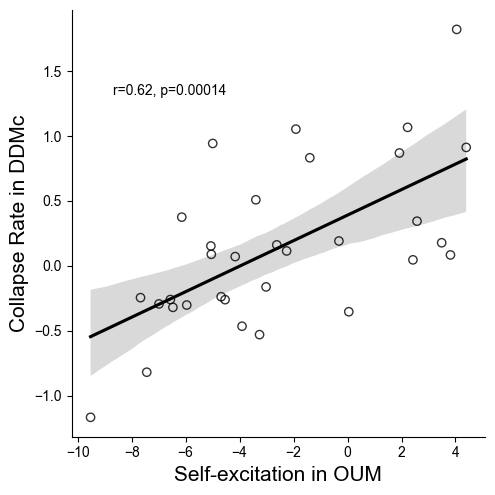

In [146]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

df["k"] = k2-k1
df["c"] = c2-c1


g = sns.lmplot(data=df, x="k",y="c",scatter_kws={"edgecolor": "black","facecolor":"none"}, line_kws={"color": "black"})

g.map_dataframe(annotate)

plt.xlabel("Self-excitation in OUM", fontsize = 15)
plt.ylabel("Collapse Rate in DDMc", fontsize = 15)

#g._legend.remove()

In [163]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh 2013', 'Dutilh 2019', 'Evans 2017', 'Lerche 2017', 'Rae 2014', 'Wagenmakers 2008']

results = pd.DataFrame()
for i in range(6):
    
    df_OUM_k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+datasets[i]+'.csv')[["Self-excitation Speed","Self-excitation Accuracy"]]
    df_DDM_c = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresult'+datasets[i]+'.csv')[["Collapse Speed","Collapse Accuracy"]]

    if datasets[i] =='Wagenmakers2008':
        df_OUM_k = df_OUM_k#.groupby(by="Participant").mean()
        df_DDM_c = df_DDM_c#.groupby(by="Participant").mean()
        
    #df_SAT_melted = transform_df_OUM_dif(df_SAT)
    #df_SAT_melted["Dataset"] = dataset_names[i]
    result = pd.concat((df_OUM_k,df_DDM_c), axis = 1)
    result["Dataset"] = dataset_names[i]
    
    results = pd.concat((results,result))
    


Text(53.89934027777778, 0.5, 'Collapse Rate in DDMc')

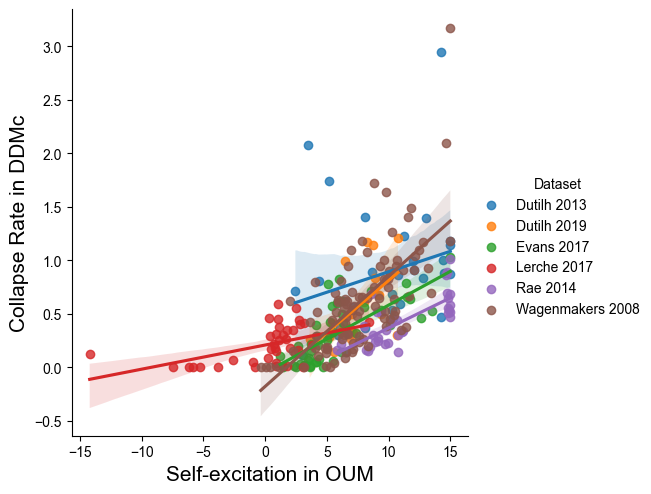

In [168]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()


g = sns.lmplot(data=results, x="Self-excitation Speed",y="Collapse Speed",hue="Dataset")
               #scatter_kws={"edgecolor": "black","facecolor":"none"}, line_kws={"color": "black"})

#g.map_dataframe(annotate)

plt.xlabel("Self-excitation in OUM", fontsize = 15)
plt.ylabel("Collapse Rate in DDMc", fontsize = 15)

#g._legend.remove()

Text(47.07965277777779, 0.5, 'Collapse Rate in DDMc')

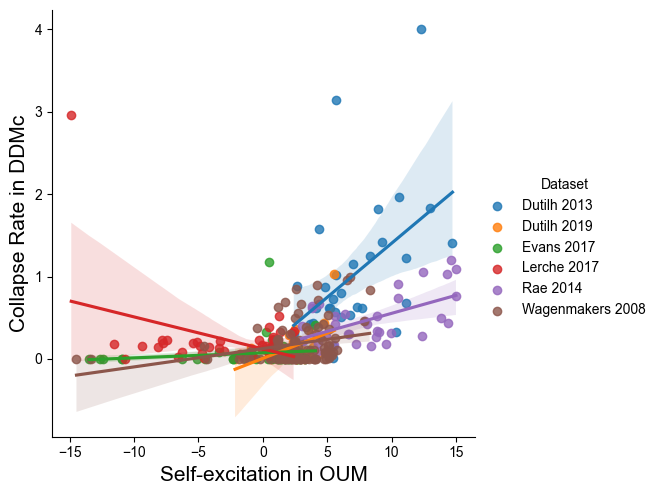

In [170]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()


g = sns.lmplot(data=results, x="Self-excitation Accuracy",y="Collapse Accuracy",hue="Dataset")
               #scatter_kws={"edgecolor": "black","facecolor":"none"}, line_kws={"color": "black"})

#g.map_dataframe(annotate)

plt.xlabel("Self-excitation in OUM", fontsize = 15)
plt.ylabel("Collapse Rate in DDMc", fontsize = 15)

#g._legend.remove()

In [2]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

results = pd.DataFrame()

for i in range(6):
    result = pd.DataFrame()
    #print(i)
    
    df_OUM_k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+datasets[i]+'.csv')[["Self-excitation Speed","Self-excitation Accuracy"]]
    df_DDM_c = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresult'+datasets[i]+'.csv')[["Collapse Speed","Collapse Accuracy"]]

    if datasets[i] =='Wagenmakers2008':
        df_OUM_k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+datasets[i]+'.csv')[["Self-excitation Speed","Self-excitation Accuracy","Participant"]]
        df_DDM_c = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresult'+datasets[i]+'.csv')[["Collapse Speed","Collapse Accuracy","Participant"]]

        df_OUM_k = df_OUM_k.groupby(by="Participant").mean()
        df_DDM_c = df_DDM_c.groupby(by="Participant").mean()
        
    df_OUM_k_dif = df_OUM_k["Self-excitation Speed"] - df_OUM_k["Self-excitation Accuracy"]
    df_DDM_c_dif = df_DDM_c["Collapse Speed"] - df_DDM_c["Collapse Accuracy"]
        
    #df_SAT_melted = transform_df_OUM_dif(df_SAT)
    #df_SAT_melted["Dataset"] = dataset_names[i]
    #result = pd.concat((df_OUM_k,df_DDM_c), axis = 1)
    
    result["Difference in Self-excitation"] = df_OUM_k_dif
    result["Difference in Collapse Rate"] = df_DDM_c_dif
    
    result["Dataset"] = dataset_names[i]
    
    results = pd.concat((results,result))


In [219]:
results = results[results["Difference in Collapse Rate"]>-2] # remove one outliar in L17 dataset

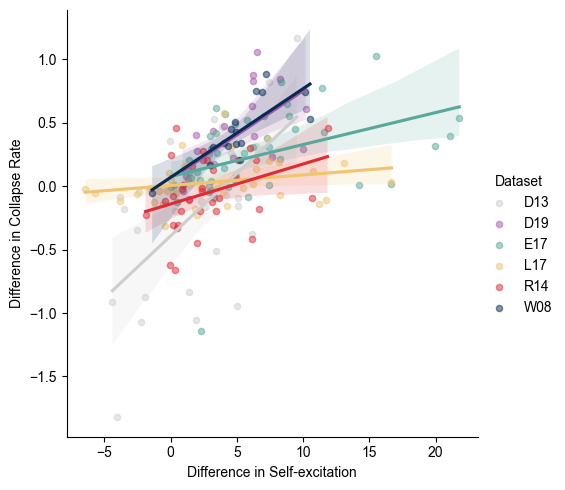

In [339]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]

g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in Collapse Rate",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":0.5})
               
               #scatter_kws={"s": 10, "edgecolor": "black","facecolor":"none"}, 
               #line_kws={"color": "black"})

#g.map_dataframe(annotate)

#plt.xlabel("Self-excitation in OUM", fontsize = 15)
#plt.ylabel("Collapse Rate in DDMc", fontsize = 15)

#g._legend.remove()

In [15]:
results

,Difference in Self-excitation,Difference in Collapse Rate,Dataset
0,6.985479,0.293377,D13
1,-2.423622,-0.046302,D13
2,-1.922242,-0.870151,D13
3,-2.225493,-1.067914,D13
4,-2.575178,-0.344444,D13
...,...,...,...
13,5.226689,0.209014,W08
14,10.518233,0.534138,W08
15,10.139087,0.746186,W08
16,4.552169,0.447680,W08


In [3]:
legend_names = []
for i in range(6):
    
    r, p = scipy.stats.pearsonr(results.loc[results["Dataset"]==dataset_names[i], "Difference in Self-excitation"],
                                results.loc[results["Dataset"]==dataset_names[i], "Difference in Collapse Rate"])
    print(dataset_names[i] + ': r={:.2f}, p={:.2g}'.format(r, p))
    
    legend_names.append(dataset_names[i] + ': r={:.2f}, p={:.2g}'.format(r, p))

D13: r=0.62, p=0.00014
D19: r=0.61, p=0.0044
E17: r=0.40, p=0.005
L17: r=0.24, p=0.15
R14: r=0.35, p=0.045
W08: r=0.78, p=0.00033


Text(56.06022222222222, 0.5, 'Difference in Collapse Rate (LCBM)')

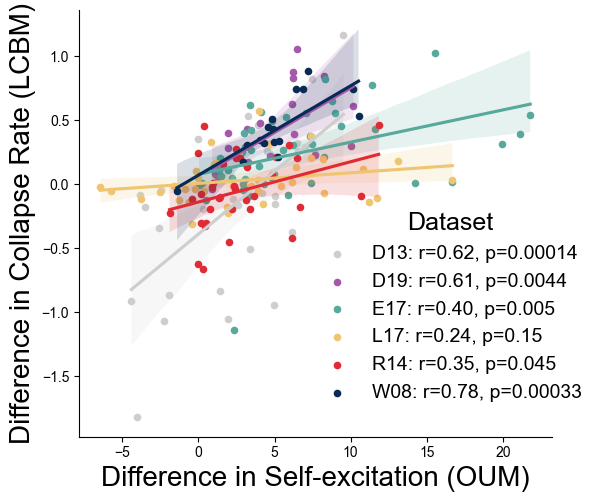

In [4]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]


g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in Collapse Rate",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":1})
               
               #scatter_kws={"s": 10, "edgecolor": "black","facecolor":"none"}, 
               #line_kws={"color": "black"})

g._legend.remove()
g.add_legend(loc='upper right',frameon=False,bbox_to_anchor=(0.9, 0.6), fontsize = 14)
plt.setp(g._legend.get_title(), fontsize=18)

# replace labels
for t, l in zip(g._legend.texts, legend_names):
    t.set_text(l)


plt.xlabel("Difference in Self-excitation (OUM)", fontsize = 20)
plt.ylabel("Difference in Collapse Rate (LCBM)", fontsize = 20)

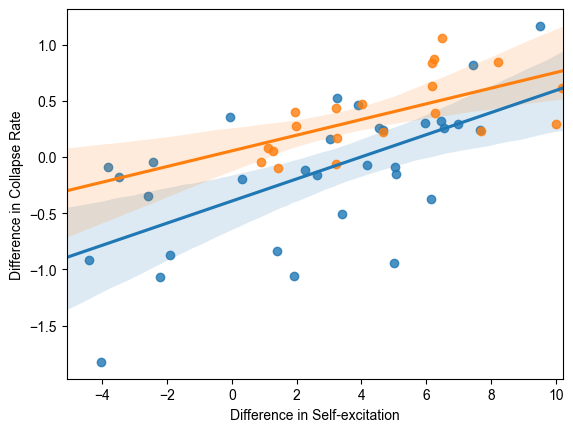

In [16]:
import pandas
import matplotlib.pyplot as plt
import seaborn

ax = plt.subplot(111)


seaborn.regplot(x="Difference in Self-excitation",y="Difference in Collapse Rate", 
                data=results[results["Dataset"]=="D13"], truncate=False, ax=ax)
seaborn.regplot(x="Difference in Self-excitation",y="Difference in Collapse Rate", 
                data=results[results["Dataset"]=="D19"], truncate=False, ax=ax)

plt.show()

Text(0, 0.5, 'Difference in Collapse Rate (LCBM)')

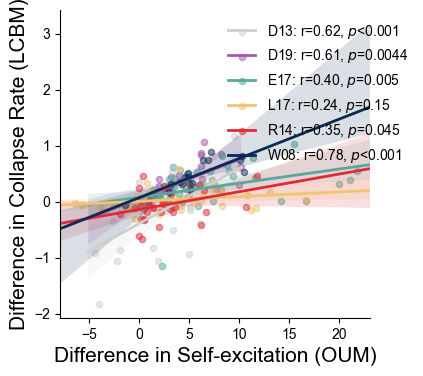

In [92]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']
for i in range(6):
               
    line = sns.regplot(x="Difference in Self-excitation",y="Difference in Collapse Rate", color=color_codes[i],
                    data=results[results["Dataset"]==dataset_names[i]], truncate=False, label=dataset_names[i],
                    scatter=True, scatter_kws={"s": 20, "alpha":0.5}, ax=ax,
                      line_kws={'lw': 2, 'label': 'Regression for ' + dataset_names[i]}) #"edgecolor":"black", 

ax.spines[['right', 'top']].set_visible(False)



handles, labels = ax.get_legend_handles_labels()
n = 6
labels_new = ["D13: r=0.62, $p$<0.001","D19: r=0.61, $p$=0.0044","E17: r=0.40, $p$=0.005","L17: r=0.24, $p$=0.15","R14: r=0.35, $p$=0.045","W08: r=0.78, $p$<0.001"]

ax.legend(handles=[(h1, h2) for h1, h2 in zip(handles[slice(0,12,2)], handles[slice(1,12,2)])],
         labels=labels_new,fontsize=10,loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False)

ax.set_xlabel("Difference in Self-excitation (OUM)", fontsize = 15)
ax.set_ylabel("Difference in Collapse Rate (LCBM)", fontsize = 15)

In [80]:
int()

TypeError: only length-1 arrays can be converted to Python scalars

slice(0, 10, 2)

In [85]:
handles[slice(1,12,2)]

In [374]:
g._legend.texts

[Text(0, 0, 'D13: r=0.62, p=0.00014'),
 Text(0, 0, 'D19: r=0.61, p=0.0044'),
 Text(0, 0, 'E17: r=0.40, p=0.005'),
 Text(0, 0, 'L17: r=0.24, p=0.15'),
 Text(0, 0, 'R14: r=0.35, p=0.045'),
 Text(0, 0, 'W08: r=0.78, p=0.00033')]

In [ ]:
l1 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["lamSpeed"]
a1 = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresultDutilh2013.csv')["aprimeSpeed"]
k1 = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresultDutilh2013.csv')["Self-excitation Speed"]
c1 = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresultDutilh2013.csv')["Collapse Speed"]


## Correlate k in OUM and parameters in DDMWeibull

In [313]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

results = pd.DataFrame()

for i in range(6):
    result = pd.DataFrame()
    #print(i)
    
    df_OUM_k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+datasets[i]+'.csv')[["Self-excitation Speed","Self-excitation Accuracy"]]
    df_DDM_Weibull = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresult'+datasets[i]+'.csv')[["Boundary Separation Speed","Boundary Separation Accuracy",
                                                                                               "lamSpeed", "lamAcc", "aprimeSpeed","aprimeAcc","kSpeed","kAcc"]]

    if datasets[i] =='Wagenmakers2008':
        df_OUM_k = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+datasets[i]+'.csv')[["Self-excitation Speed","Self-excitation Accuracy","Participant"]]
        df_DDM_Weibull = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresult'+datasets[i]+'.csv')[["Participant","Boundary Separation Speed","Boundary Separation Accuracy",
                                                                                               "lamSpeed", "lamAcc", "aprimeSpeed","aprimeAcc","kSpeed","kAcc"]]

        df_OUM_k = df_OUM_k.groupby(by="Participant").mean()
        df_DDM_Weibull = df_DDM_Weibull.groupby(by="Participant").mean()
        
    df_OUM_k_dif = df_OUM_k["Self-excitation Speed"] - df_OUM_k["Self-excitation Accuracy"]
    
    df_DDM_a_dif = df_DDM_c["Boundary Separation Speed"] - df_DDM_c["Boundary Separation Accuracy"]
    df_DDM_l_dif = df_DDM_c["lamSpeed"] - df_DDM_c["lamAcc"]
    df_DDM_aprime_dif = df_DDM_c["aprimeSpeed"] - df_DDM_c["aprimeAcc"]
    df_DDM_k_dif = df_DDM_c["kSpeed"] - df_DDM_c["kAcc"]
        
    #df_SAT_melted = transform_df_OUM_dif(df_SAT)
    #df_SAT_melted["Dataset"] = dataset_names[i]
    #result = pd.concat((df_OUM_k,df_DDM_c), axis = 1)
    
    result["Difference in Self-excitation"] = df_OUM_k_dif
    
    result["Difference in Boundary Separation"] = df_DDM_a_dif
    result["Difference in aprime"] = df_DDM_aprime_dif
    result["Difference in lambda"] = df_DDM_l_dif
    result["Difference in k"] = df_DDM_k_dif

    result["Dataset"] = dataset_names[i]
    
    results = pd.concat((results,result))


In [314]:
results

,Difference in Self-excitation,Difference in Boundary Separation,Difference in aprime,Difference in lambda,Difference in k,Dataset
0,6.985479,0.041824,-0.255579,-0.021574,-0.754745,D13
1,-2.423622,-0.152037,-0.501190,0.737781,-2.885280,D13
2,-1.922242,-0.655712,0.189434,0.200439,2.335767,D13
3,-2.225493,-1.132281,-0.157499,-0.161446,0.298408,D13
4,-2.575178,0.013661,0.160788,-0.080705,-1.463684,D13
...,...,...,...,...,...,...
13,5.226689,-0.060787,-0.186399,-0.114662,-1.178053,W08
14,10.518233,0.160000,-0.172033,-0.097881,0.010723,W08
15,10.139087,-0.016493,0.409030,-0.541934,2.221344,W08
16,4.552169,0.013170,-0.101032,-0.192133,-3.162174,W08


Text(40.269111111111116, 0.5, 'Difference in Boundary Separation (CBM)')

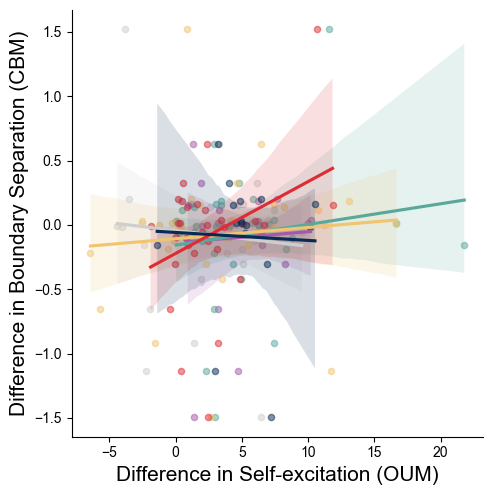

In [333]:

#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]


g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in Boundary Separation",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":0.5})
g._legend.remove()

plt.xlabel("Difference in Self-excitation (OUM)", fontsize = 15)
plt.ylabel("Difference in Boundary Separation (CBM)", fontsize = 15)

Text(40.269111111111116, 0.5, 'Difference in aprime (CBM)')

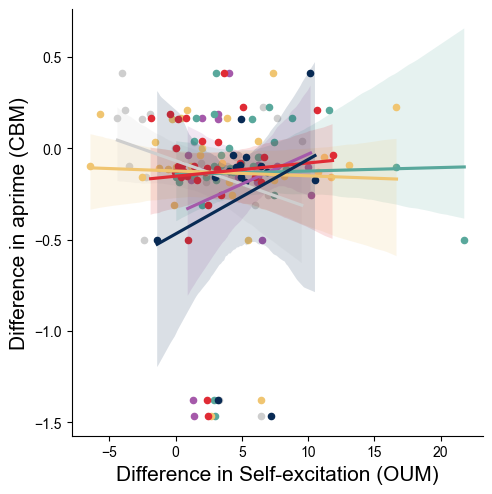

In [332]:

#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]


g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in aprime",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":1})
            
g._legend.remove()

plt.xlabel("Difference in Self-excitation (OUM)", fontsize = 15)
plt.ylabel("Difference in aprime (CBM)", fontsize = 15)

Text(40.269111111111116, 0.5, 'Difference in lambda (CBM)')

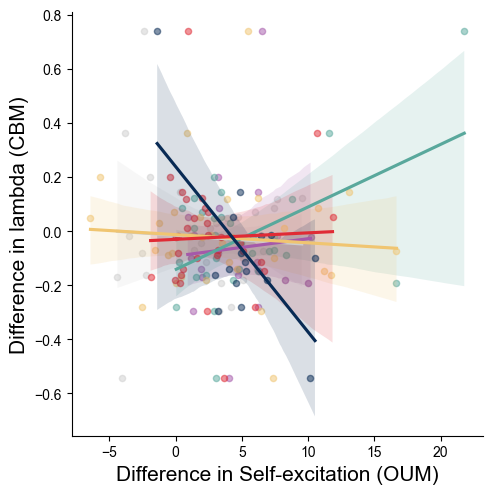

In [334]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]


g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in lambda",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":0.5})

g._legend.remove()

plt.xlabel("Difference in Self-excitation (OUM)", fontsize = 15)
plt.ylabel("Difference in lambda (CBM)", fontsize = 15)

Text(38.44398611111112, 0.5, 'Difference in k (CBM)')

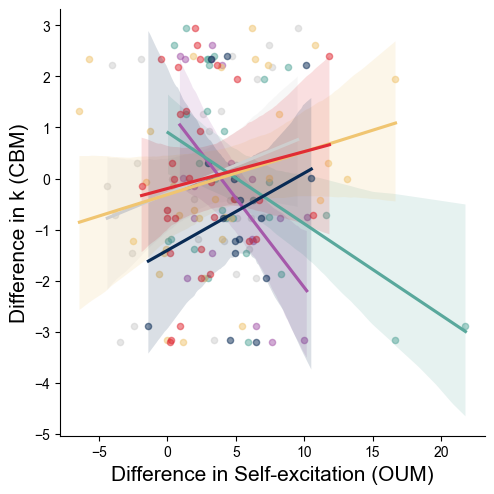

In [335]:
#fig, ax = plt.subplots(1,1, figsize=(4,4))
df = pd.DataFrame()

color_codes = ["#cecece", "#a559aa", "#59a89c", "#f0c571", "#e02b35", "#082a54"]


g = sns.lmplot(data=results, x="Difference in Self-excitation",y="Difference in k",
               hue="Dataset", palette = color_codes,scatter_kws={"s": 20, "alpha":0.5})

g._legend.remove()

plt.xlabel("Difference in Self-excitation (OUM)", fontsize = 15)
plt.ylabel("Difference in k (CBM)", fontsize = 15)